In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [118]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
forecast_df = pd.read_excel('C:/Users/Ashish/Desktop/machine learning/forecast.xls')


In [3]:
forecast_df.head()

,year,quarter,demand
0,2012,Q1,75
1,2012,Q2,60
2,2012,Q3,54
3,2012,Q4,59
4,2013,Q1,86


In [4]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     16 non-null     int64 
 1   quarter  16 non-null     object
 2   demand   16 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 516.0+ bytes


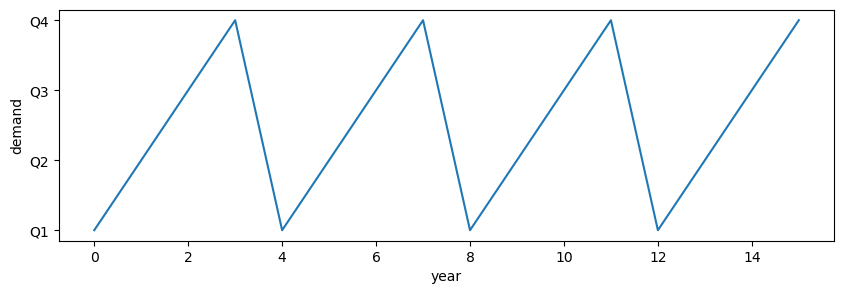

In [5]:
plt.figure(figsize =(10,3))
plt.xlabel("year")
plt.ylabel("demand")
plt.plot(forecast_df['quarter'])

plt.show()

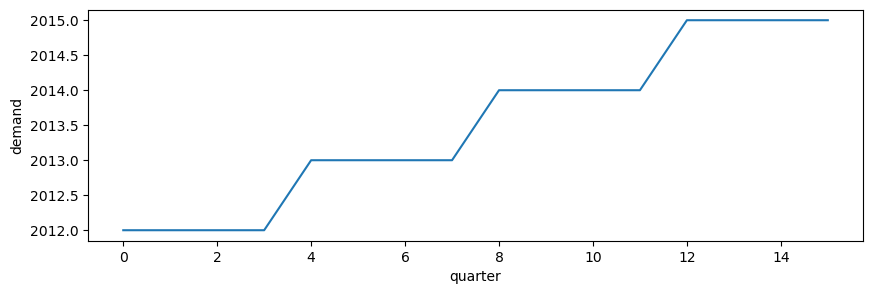

In [6]:
plt.figure(figsize =(10,3))
plt.xlabel("quarter")
plt.ylabel("demand")
plt.plot(forecast_df['year'])

plt.show()

In [7]:
forecast_df["mavg4"] = forecast_df["demand"].rolling(window = 12).mean().shift(1)

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
forecast_df[['demand', 'mavg4']][12:]

,demand,mavg4
12,100,71.25
13,78,73.33
14,72,74.83
15,93,76.33


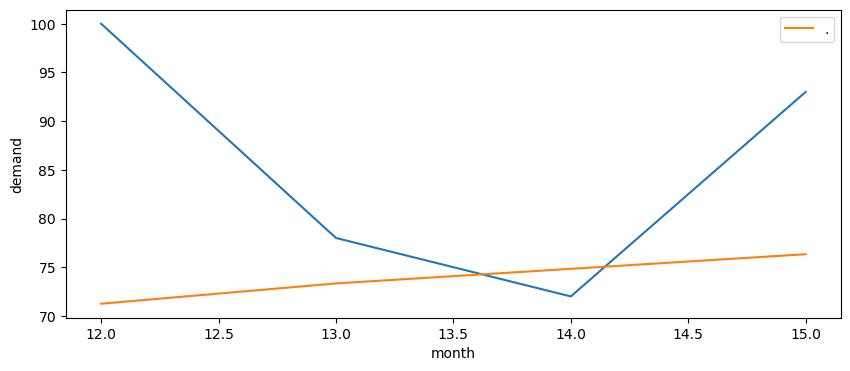

In [9]:
plt.figure(figsize = (10,4))
plt.xlabel('month')
plt.ylabel('demand')
plt.plot(forecast_df['demand'][12:])
plt.plot(forecast_df['mavg4'][12:], label = '.')
plt.legend()
plt.show()

In [10]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100, 2)

In [11]:
get_mape(forecast_df["demand"][12:].values, forecast_df['mavg4'][12:].values)

14.15

In [12]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(forecast_df['demand'][12:].values, forecast_df['mavg4'][12:].values))

16.838540861171236

In [13]:
# exponential smoothing
forecast_df['ewm'] = forecast_df['demand'].ewm(alpha = 0.2).mean()

In [14]:
pd.options.display.float_format = '{:.2f}'.format

In [15]:
forecast_df[12:]

,year,quarter,demand,mavg4,ewm
12,2015,Q1,100,71.25,80.16
13,2015,Q2,78,73.33,79.71
14,2015,Q3,72,74.83,78.11
15,2015,Q4,93,76.33,81.18


In [16]:
get_mape(forecast_df[["demand"]][12:].values, forecast_df[["ewm"]][12:].values)

10.81

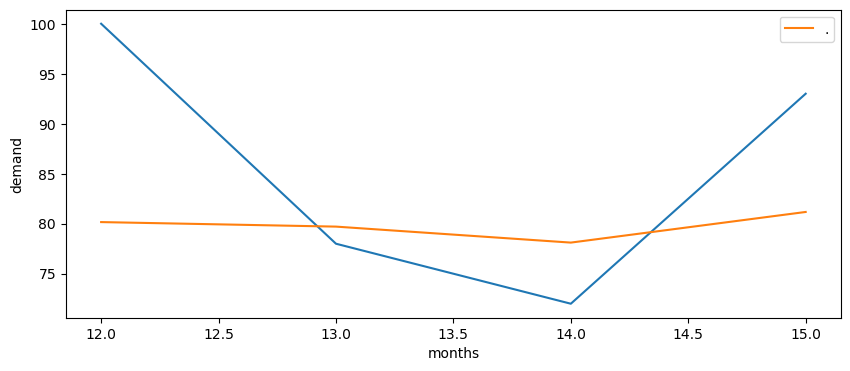

In [17]:
plt.figure(figsize= (10,4))
plt.xlabel("months")
plt.ylabel("demand")
plt.plot(forecast_df["demand"][12:])
plt.plot(forecast_df["ewm"][12:], label = '.')
plt.legend()
plt.show()

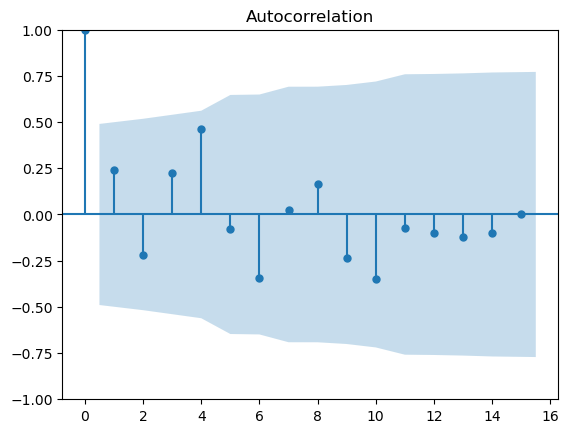

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(forecast_df.demand, lags = 15)
plt.show()

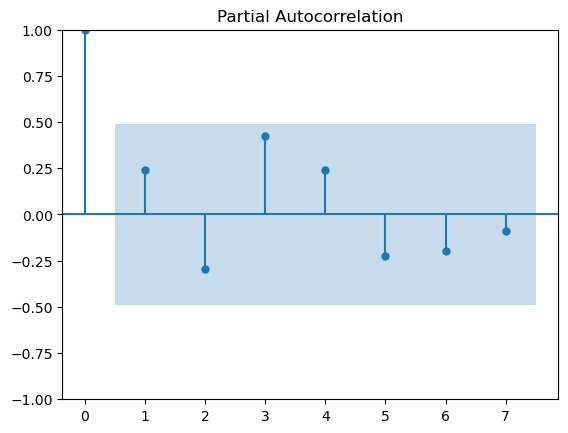

In [60]:
pacf_plot = plot_pacf(forecast_df.demand, lags = 7)
plt.show()

In [68]:
from statsmodels.tsa.arima.model import ARIMA

In [120]:
arima = ARIMA(forecast_df.demand[0:10].astype(np.float64).values, order = (1,1,1))
ar_model = arima.fit()

In [122]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -36.065
Date:                Tue, 08 Apr 2025   AIC                             78.131
Time:                        12:11:23   BIC                             78.723
Sample:                             0   HQIC                            76.854
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2810      1.070      0.263      0.793      -1.816       2.378
ma.L1         -0.9991    217.793     -0.005      0.996    -427.865     425.867
sigma2       145.1077   3.15e+04      0.005      0.996   -6.17e+04    6.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.96   Prob(JB):                         0.57
Heteroskedasticity (H):               2.09   Skew:                             0.59
Prob(H) (two-sided):                  0.56   Kurtosis:                         1.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
forecast_10_15 = ar_model.predict(13,16)
forecast_10_15

array([70.63208192, 70.62590875, 70.6241739 , 70.62368635])

In [126]:
get_mape(forecast_df.demand[12:], forecast_10_15)

16.2

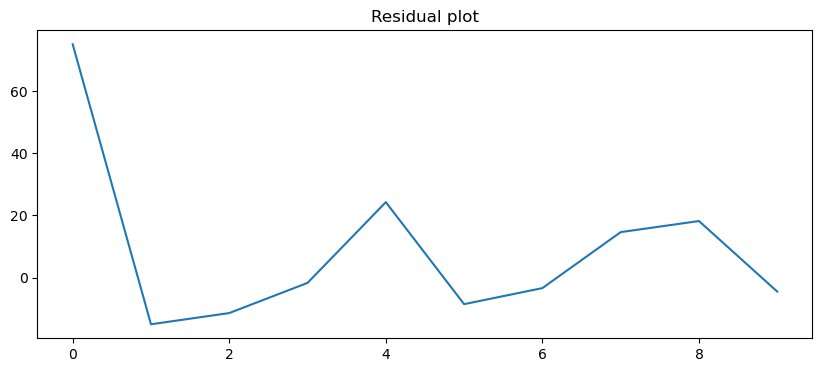

In [138]:
residuals = ar_model.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residual plot")
plt.show()

In [128]:
arima = ARIMA(forecast_df.demand[0:10].astype(np.float64).values, order = (2,1,1))
ma_model = arima.fit()

In [130]:
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -34.820
Date:                Tue, 08 Apr 2025   AIC                             77.639
Time:                        12:11:44   BIC                             78.428
Sample:                             0   HQIC                            75.937
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1209      0.774     -0.156      0.876      -1.639       1.397
ar.L2         -0.6180      0.414     -1.491      0.136      -1.430       0.194
ma.L1         -0.3753      0.885     -0.424      0.672      -2.110       1.359
sigma2       115.3437    122.725      0.940      0.347    -125.194     355.881
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.58   Prob(JB):                         0.67
Heteroskedasticity (H):               1.20   Skew:                             0.45
Prob(H) (two-sided):                  0.88   Kurtosis:                         1.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
forecast_10_15 = ma_model.predict(13,16)
get_mape(forecast_df.demand[12:], forecast_10_15)

14.26

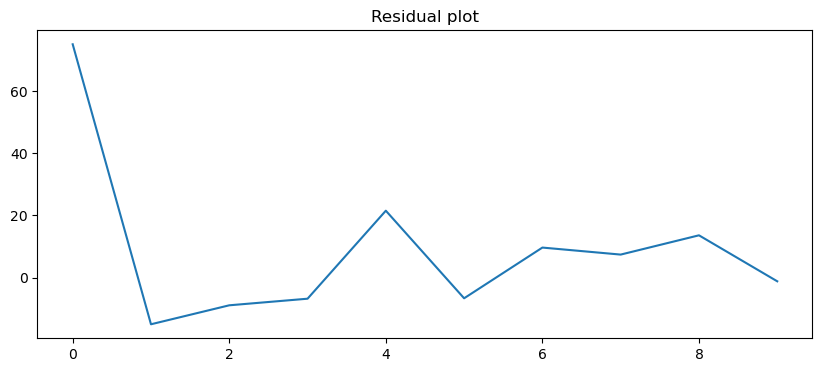

In [140]:
residuals = ma_model.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residual plot")
plt.show()

In [134]:
arima = ARIMA(forecast_df.demand[0:10].astype(np.float64).values, order = (3,1,1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -33.217
Date:                Tue, 08 Apr 2025   AIC                             76.434
Time:                        12:11:58   BIC                             77.420
Sample:                             0   HQIC                            74.306
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1299      0.559     -2.021      0.043      -2.226      -0.034
ar.L2         -0.9939      0.801     -1.241      0.215      -2.563       0.575
ar.L3         -0.7972      0.318     -2.504      0.012      -1.421      -0.173
ma.L1          0.6453      2.652      0.243      0.808      -4.552       5.843
sigma2        67.5587     95.953      0.704      0.481    -120.506     255.624
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.74   Prob(JB):                         0.77
Heteroskedasticity (H):               1.53   Skew:                             0.18
Prob(H) (two-sided):                  0.73   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
forcast_10_15 = arma_model.predict(13,16)
get_mape(forecast_df.demand[12:], forcast_10_15)

13.78

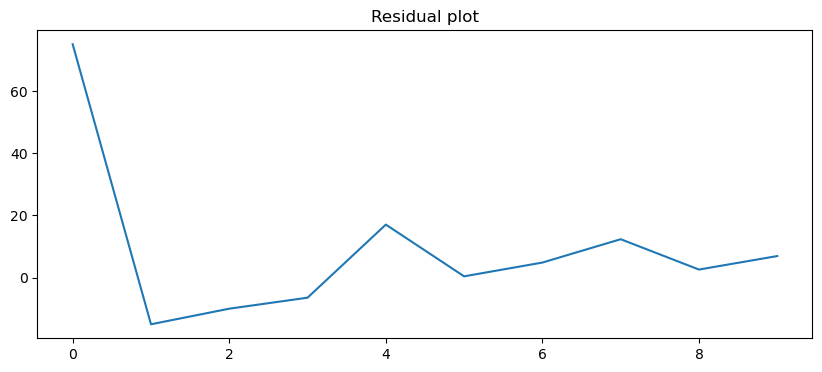

In [142]:
residuals = arma_model.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residual plot")
plt.show()